## Pipeline which i am going to go through in this competition:
* Data Exploration 
* fill the missing values randomly and build few baseline model 
* More Data exploration
* See the corelation betweeen different variables 
* Deal with missing values smartly
* feature engg
* Build a baseline model after this , iteration 1 ends here.
* Do some more feature engg,  try some advqanced methodologies 
* Try ensembling/stacking, with the best availble models 
## since the data is medium sized, may be neural netorks wont help much we will see that by experimenting with the neural networks.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import sys
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report, average_precision_score
import xgboost as xgb
from xgboost import plot_importance, to_graphviz
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import graphviz
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['data-id', 'student-datafest-2018']


In [2]:
train = pd.read_csv('../input/data-id/train.csv')
test = pd.read_csv('../input/data-id/test.csv')


In [3]:
print(train.shape)
train.head()

(73147, 16)


,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,26.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,30.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,45.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,43.0,2,N,4.0,1


In [4]:
print(test.shape)
test.head()


(31349, 15)


,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,1626_45,T_1,T,131,45,offline,intermediate,1626,F,Matriculation,3,50.0,2,N,4.0
1,11020_130,Y_3,Y,135,130,online,easy,11020,M,Bachelors,3,22.0,4,N,4.0
2,12652_146,Y_2,Y,120,146,online,easy,12652,M,Matriculation,3,24.0,2,N,3.0
3,7038_72,V_4,V,122,72,offline,vary hard,7038,F,High School Diploma,1,27.0,2,N,2.0
4,888_71,V_4,V,122,71,offline,intermediate,888,F,Matriculation,3,18.0,2,N,2.0


% of 1's : 0.6954078772882005
% of 0's : 0.30459212271179953


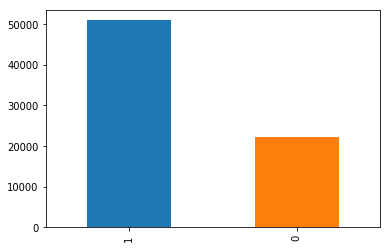

In [5]:
## is it imbalanced or not 
train['is_pass'].value_counts().plot(kind = "bar")
print("% of 1's :" ,  len(train[train['is_pass'] == 1]) / len(train))
print("% of 0's :" ,  len(train[train['is_pass'] == 0]) / len(train))

## It is imbalanced but not highly imbalanced, so we will try undersampling and smote 

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
id                           73147 non-null object
program_id                   73147 non-null object
program_type                 73147 non-null object
program_duration             73147 non-null int64
test_id                      73147 non-null int64
test_type                    73147 non-null object
difficulty_level             73147 non-null object
trainee_id                   73147 non-null int64
gender                       73147 non-null object
education                    73147 non-null object
city_tier                    73147 non-null int64
age                          67303 non-null float64
total_programs_enrolled      73147 non-null int64
is_handicapped               73147 non-null object
trainee_engagement_rating    73070 non-null float64
is_pass                      73147 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 8.9+ MB


## only two columns age and trainee_engagement_rating are having missing values , we will deal with them.

## city_tier is a categorical variable so we will convert it to the str

In [7]:
train.describe()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,73147.000000,73147.000000,73147.000000,73147.000000,67303.000000,73147.000000,73070.000000,73147.000000
mean,128.208676,91.079306,9843.079620,2.246845,33.664755,2.583934,2.395634,0.695408
std,6.889679,51.239048,5703.556093,1.011587,10.341186,1.240816,1.325288,0.460238
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5040.000000,1.000000,25.000000,2.000000,1.000000,0.000000
50%,131.000000,90.000000,9641.000000,2.000000,32.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14552.000000,3.000000,42.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20098.000000,4.000000,69.000000,14.000000,5.000000,1.000000


In [8]:
train.describe(include = 'all')

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
count,73147,73147,73147,73147.000000,73147.000000,73147,73147,73147.000000,73147,73147,73147.000000,67303.000000,73147.000000,73147,73070.000000,73147.000000
unique,73147,22,7,NaN,NaN,2,4,NaN,2,5,NaN,NaN,NaN,2,NaN,NaN
top,5088_97,Y_1,Y,NaN,NaN,offline,easy,NaN,M,High School Diploma,NaN,NaN,NaN,N,NaN,NaN
freq,1,6687,22560,NaN,NaN,43543,40101,NaN,39043,34371,NaN,NaN,NaN,66577,NaN,NaN
mean,NaN,NaN,NaN,128.208676,91.079306,NaN,NaN,9843.079620,NaN,NaN,2.246845,33.664755,2.583934,NaN,2.395634,0.695408
std,NaN,NaN,NaN,6.889679,51.239048,NaN,NaN,5703.556093,NaN,NaN,1.011587,10.341186,1.240816,NaN,1.325288,0.460238
min,NaN,NaN,NaN,117.000000,0.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,17.000000,1.000000,NaN,1.000000,0.000000
25%,NaN,NaN,NaN,121.000000,45.000000,NaN,NaN,5040.000000,NaN,NaN,1.000000,25.000000,2.000000,NaN,1.000000,0.000000
50%,NaN,NaN,NaN,131.000000,90.000000,NaN,NaN,9641.000000,NaN,NaN,2.000000,32.000000,2.000000,NaN,2.000000,1.000000
75%,NaN,NaN,NaN,134.000000,135.000000,NaN,NaN,14552.000000,NaN,NaN,3.000000,42.000000,3.000000,NaN,4.000000,1.000000


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 15 columns):
id                           31349 non-null object
program_id                   31349 non-null object
program_type                 31349 non-null object
program_duration             31349 non-null int64
test_id                      31349 non-null int64
test_type                    31349 non-null object
difficulty_level             31349 non-null object
trainee_id                   31349 non-null int64
gender                       31349 non-null object
education                    31349 non-null object
city_tier                    31349 non-null int64
age                          28905 non-null float64
total_programs_enrolled      31349 non-null int64
is_handicapped               31349 non-null object
trainee_engagement_rating    31318 non-null float64
dtypes: float64(2), int64(5), object(8)
memory usage: 3.6+ MB


## same is true for the test data age and trainee engagement rating are having missing values 

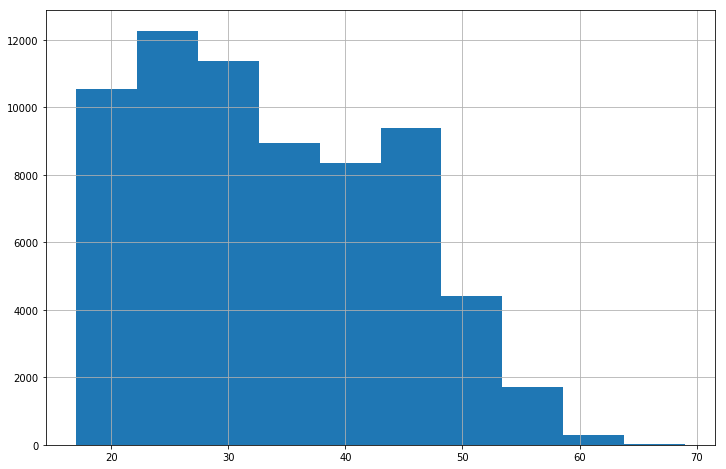

In [10]:
plt.figure(figsize =(12,8))
train['age'].hist()

In [11]:
train.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')

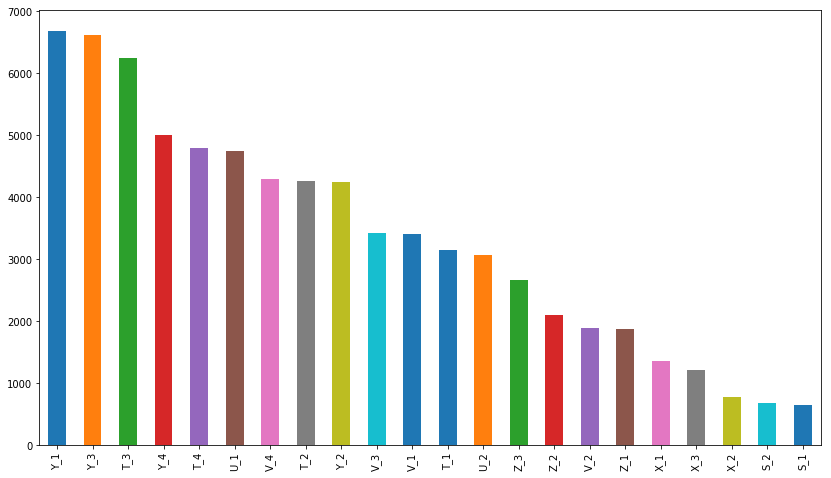

In [12]:
plt.figure(figsize =(14,8))
train['program_id'].value_counts().plot(kind = 'bar')

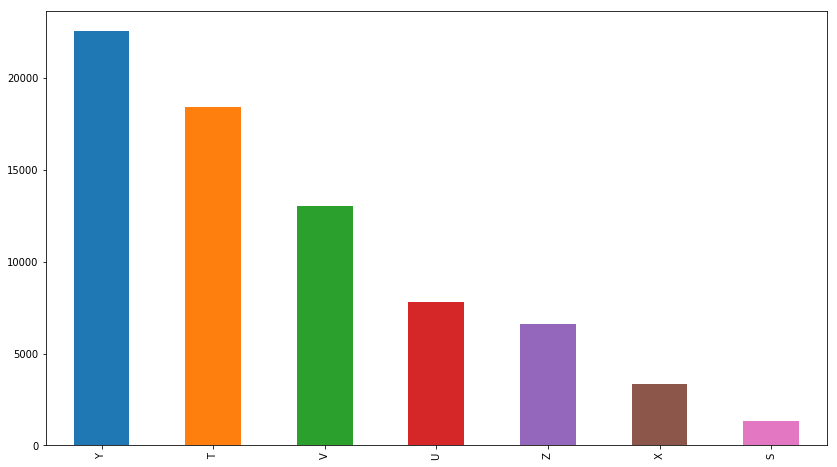

In [13]:
plt.figure(figsize =(14,8))
train['program_type'].value_counts().plot(kind = 'bar')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

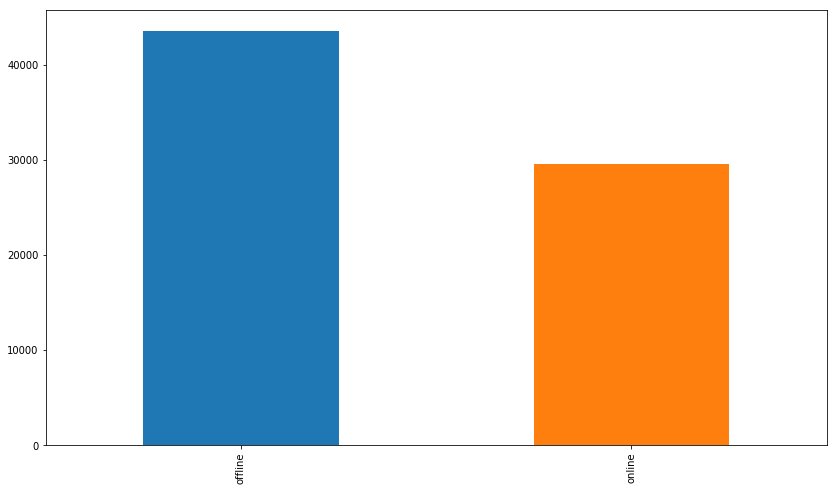

In [14]:
plt.figure(figsize =(14,8))
train['test_type'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 90)

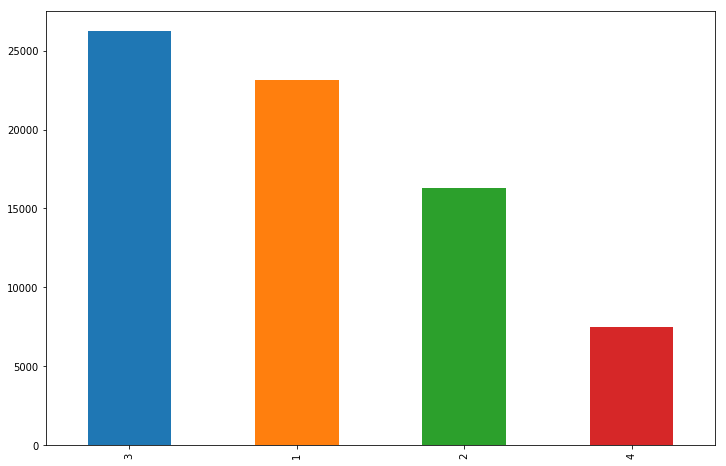

In [15]:
plt.figure(figsize =(12,8))
train['city_tier'].value_counts().plot(kind = 'bar')

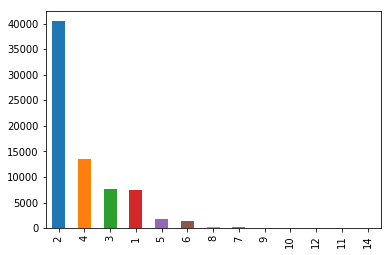

In [16]:
train['total_programs_enrolled'].value_counts().plot(kind = 'bar')

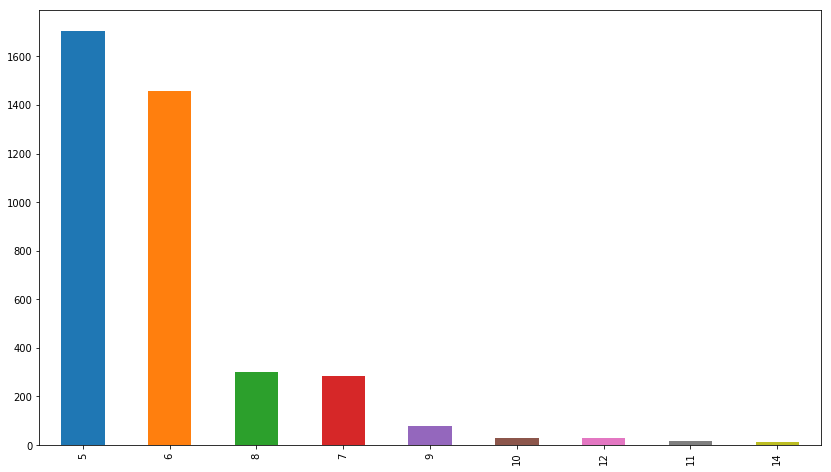

In [17]:
## things are not clear in the above graph let's try to build the graph for the total_programs > 4.
train_4 = train[train['total_programs_enrolled'] > 4]
plt.figure(figsize = (14,8))
train_4['total_programs_enrolled'].value_counts().plot(kind  ='bar')

## i want to explore even more details lets just go for > 6 programs

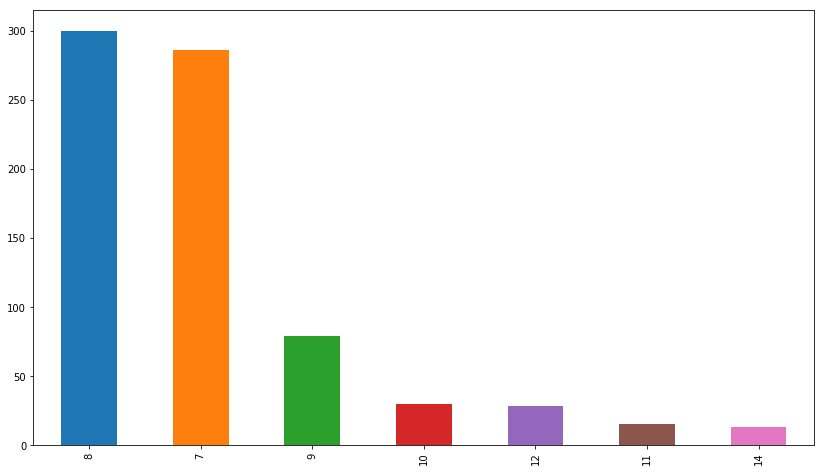

In [18]:
train_7 = train[train['total_programs_enrolled'] > 6]
plt.figure(figsize = (14,8))
train_7['total_programs_enrolled'].value_counts().plot(kind = 'bar')

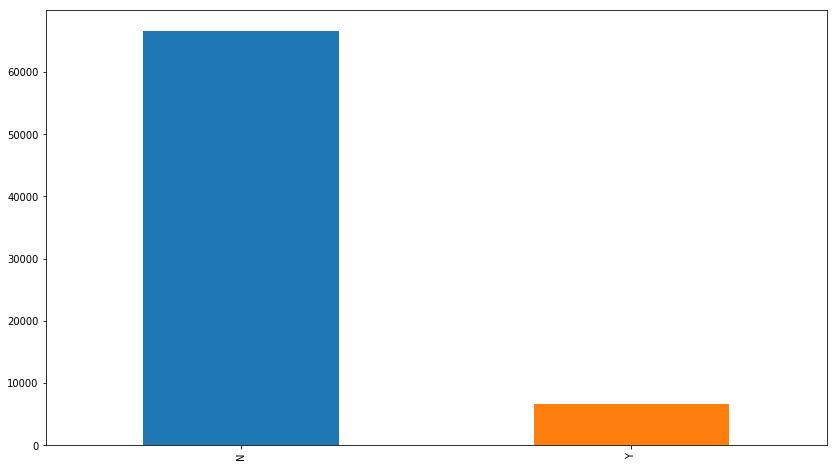

In [19]:
plt.figure(figsize =(14,8))
train['is_handicapped'].value_counts().plot(kind = 'bar')

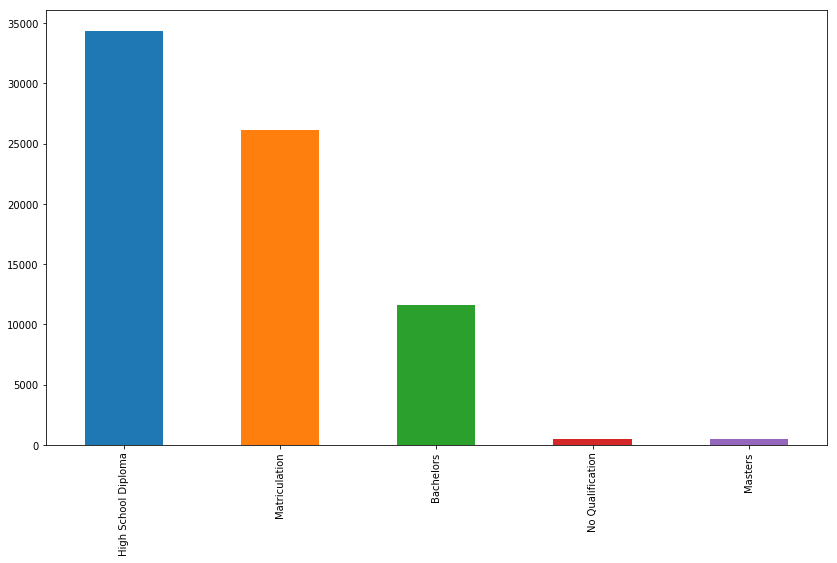

In [20]:
plt.figure(figsize =(14,8))
train['education'].value_counts().plot(kind = 'bar')

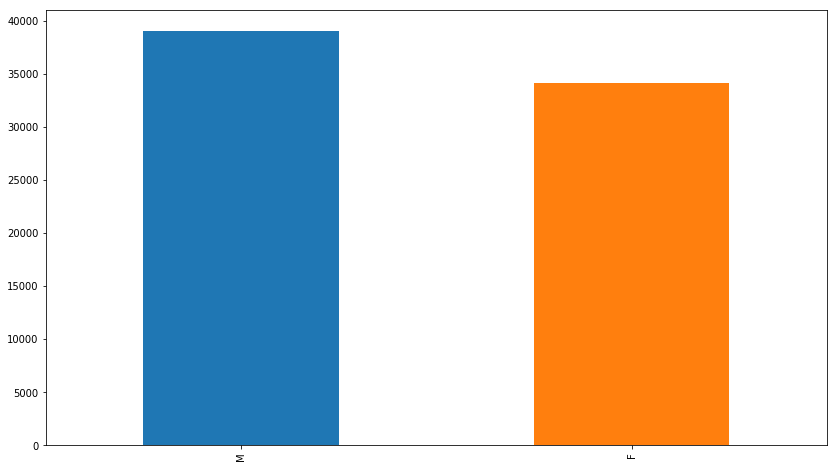

In [21]:
plt.figure(figsize =(14,8))
train['gender'].value_counts().plot(kind = 'bar')

## Attempt to fil the age column
## only 8% values are missing.

## we will try to build some model and fill in the missing values.

In [22]:
train_20 = train[train['age'] < 20]
train_20.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
8,5652_57,U_1,U,134,57,offline,easy,5652,M,Matriculation,4,17.0,3,N,3.0,1
20,10498_159,Y_1,Y,136,159,online,easy,10498,M,High School Diploma,3,18.0,2,N,4.0,1
25,16955_99,V_1,V,133,99,offline,hard,16955,F,High School Diploma,1,17.0,4,Y,1.0,0
57,18693_125,Y_3,Y,135,125,offline,intermediate,18693,M,Bachelors,3,18.0,2,N,4.0,0
86,2456_130,Y_3,Y,135,130,online,easy,2456,M,Matriculation,1,19.0,4,N,2.0,1


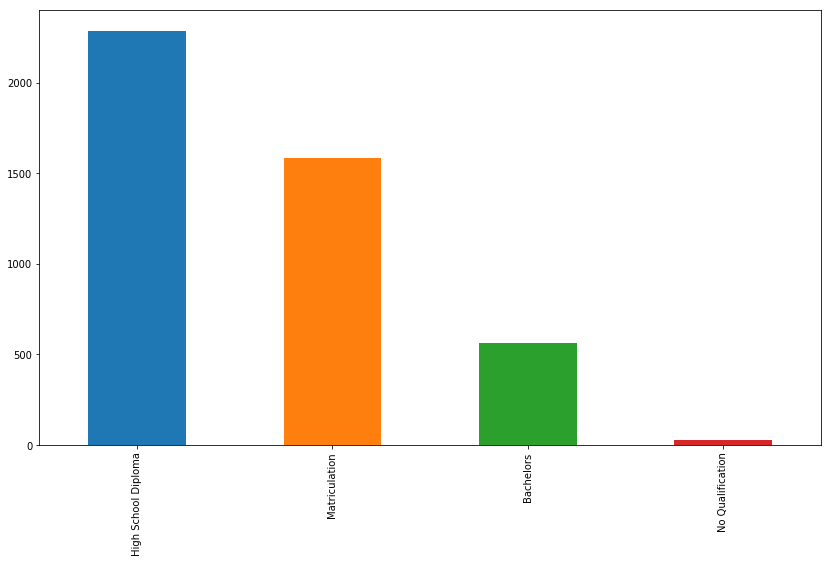

In [23]:
col = ['education' , 'age' , 'gender']
plt.figure(figsize = (14,8))
train_20['education'].value_counts().plot(kind = 'bar')

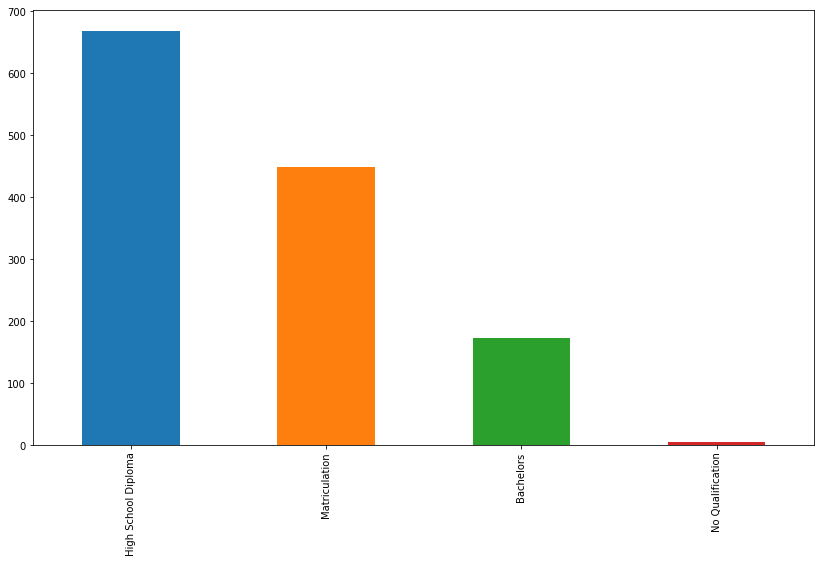

In [24]:
## Lest be more precise and see what the distribution in 17,18,19 year old.
train_17 = train[train['age'] == 17]
plt.figure(figsize = (14,8))
train_17['education'].value_counts().plot(kind = 'bar')

## this seems unnatural students in there 17 have did there bachelors, this is not possible. So maybe they were started pursuing Bachelors. This was was unexpected since i thought that people in there 17 must have the highest qualification of matriculation. Anyways, let's check for 18


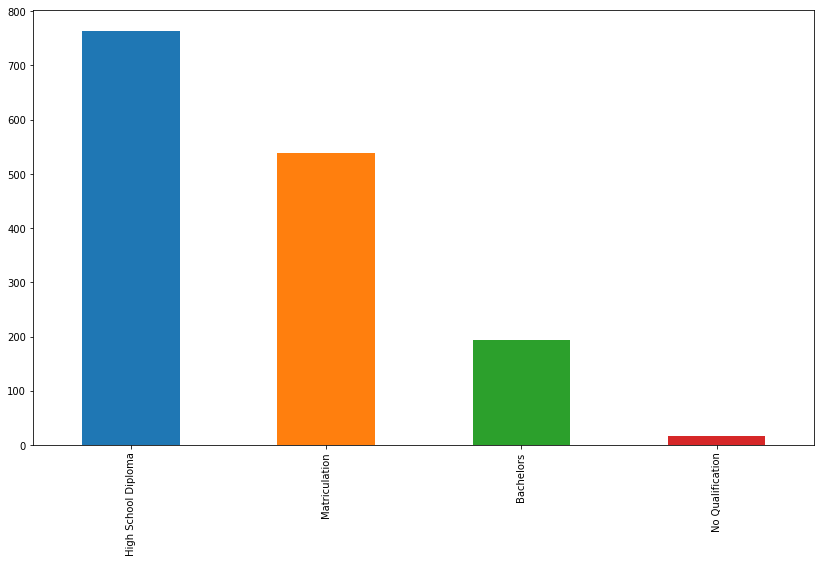

In [25]:
train_18 = train[train['age'] == 18]
plt.figure(figsize = (14,8))
train_18['education'].value_counts().plot(kind = 'bar')

## Similar results as 17, finally make a check for the 19

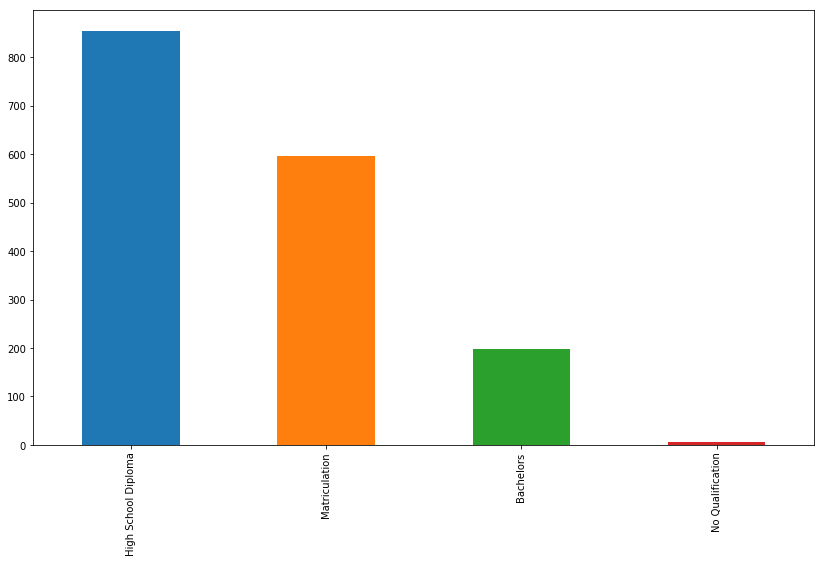

In [26]:
train_19 = train[train['age'] == 19]
plt.figure(figsize = (14,8))
train_19['education'].value_counts().plot(kind = 'bar')

## Ok so we have two majority classes "High School Diploma" and "Matriculation" among the 17,18 and 19 year old trainees 
## bar plots are not enough, but there is something which is much more effective to visualise the things rather than bar plot. Yes , which is countplot and barplot of sns, which i used in my other notebook. I want to plot bar plots which also show the ratio of the male and feamle candidates.

## for trainee_engagement_rating you dont have to put much effort since there are just 0.001% of missing values, so we will fill them up with the 75% value which is 4.

In [27]:
train['trainee_engagement_rating'].fillna(1 , inplace = True)

Total candidates between age 20 and age 40: 46435
% of candidates between age 20 and age 40: 0.6348175591616881


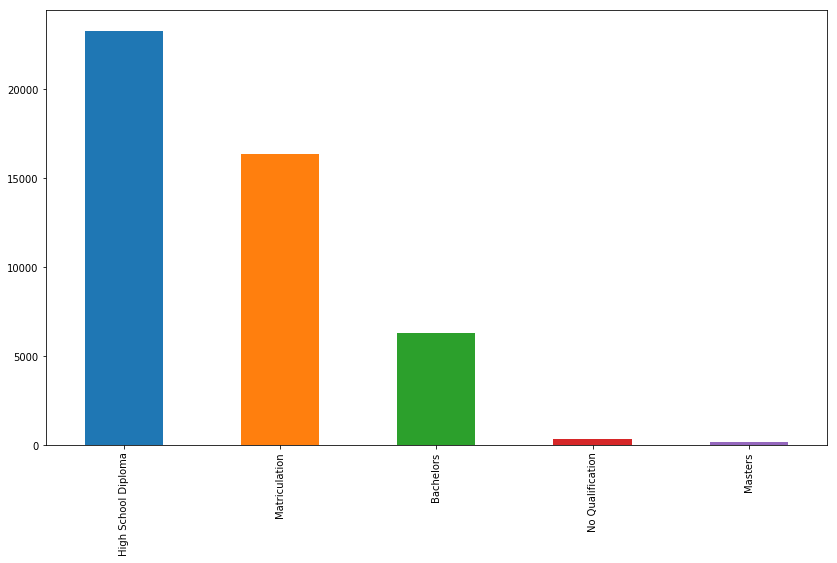

In [28]:
## So we only need to deal with the age 
train_40 = train[(train['age'] >= 17) & (train['age'] < 40)]
plt.figure(figsize = (14,8))
train_40['education'].value_counts().plot(kind = 'bar')
print('Total candidates between age 20 and age 40:' , len(train_40))
print('% of candidates between age 20 and age 40:' , len(train_40)/len(train))

## Almost 63% of the people belong to the age grioupof 17  and 40.

Total candidates between age 40 and age 60: 20682
% of candidates between age 40 and age 60: 0.2827457038566175


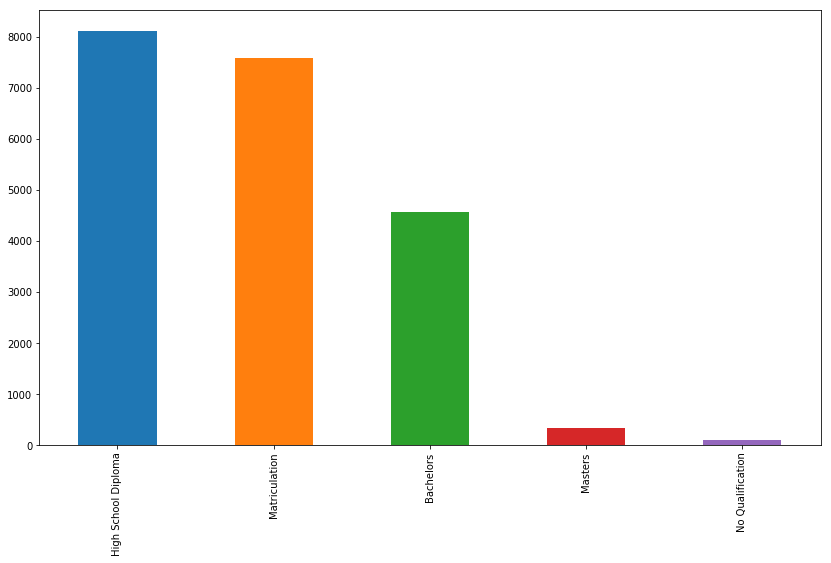

In [29]:
train_60 = train[(train['age'] >= 40) & (train['age'] < 60)]
plt.figure(figsize = (14,8))
train_60['education'].value_counts().plot(kind = 'bar')
print('Total candidates between age 40 and age 60:' , len(train_60))
print('% of candidates between age 40 and age 60:' , len(train_60)/len(train))

Total candidates between age 40 and age 60: 186
% of candidates between age 40 and age 60: 0.002542824722818434


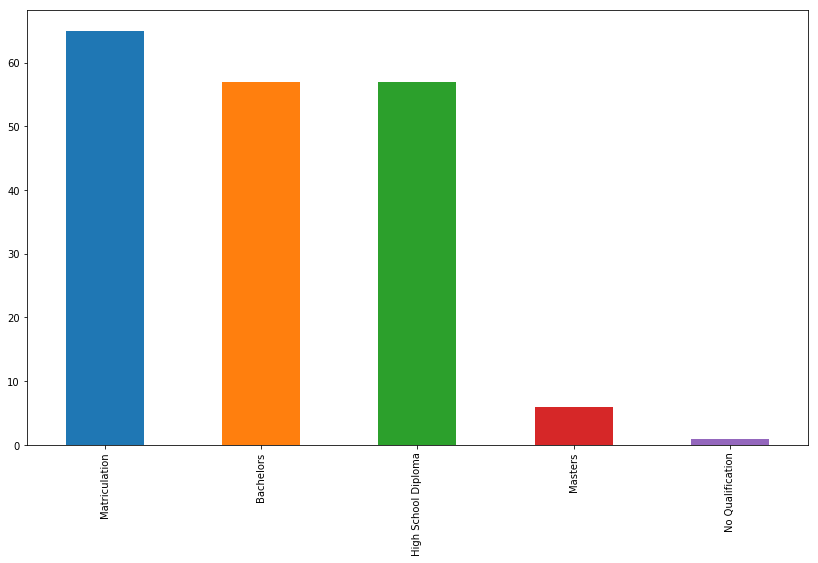

In [30]:
train_61 = train[(train['age'] >= 60)]
plt.figure(figsize = (14,8))
train_61['education'].value_counts().plot(kind = 'bar')
print('Total candidates between age 40 and age 60:' , len(train_61))
print('% of candidates between age 40 and age 60:' , len(train_61)/len(train))

## plotting for 60+ doesn't make much sense in the same way, building them as a feature also wont make much of a difference
## Looks like my intutition didnot get me in the right direction.
## since i am not able to get useful pattern between the graduation between age. we will try some other stuff

In [31]:
train.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')

## Possible variables, which can be useful to find the age are: gender, education, total_programs_enrolled. These four variable can be responible to decide the age group. So we will do some more bivariate and multivariate analysis.

## Now, we will build our baseline model by putting the majority class in age which is High School Diploma

In [32]:
train_c = train

In [33]:
train_c.shape

(73147, 16)

In [34]:
train_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
id                           73147 non-null object
program_id                   73147 non-null object
program_type                 73147 non-null object
program_duration             73147 non-null int64
test_id                      73147 non-null int64
test_type                    73147 non-null object
difficulty_level             73147 non-null object
trainee_id                   73147 non-null int64
gender                       73147 non-null object
education                    73147 non-null object
city_tier                    73147 non-null int64
age                          67303 non-null float64
total_programs_enrolled      73147 non-null int64
is_handicapped               73147 non-null object
trainee_engagement_rating    73147 non-null float64
is_pass                      73147 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 8.9+ MB


In [35]:
train_c['trainee_engagement_rating'].fillna(1 , inplace = True)
## First change the age to int then to str
## len(train[train['age'] == 'NaN'])
## this trick didn't work here



## since i am planning to use age in terms of ranges like age20_40 or age40_60 and about 55% of age people belong to the age20_40
* initial features :
* age17_40 and age40+
* final features :
* age17_30, age30_40, age40_50, age50+

In [36]:
## to build the initial features we will fill the NaN values with the 30,since i am trying to put in the majority range.
## train_c['age'].fillna(30 , inplace = True)
## train_c['age'].value_counts()       ## This time we will let xgboost handle the missing values, we will not involve age in dummy variable.

## Now let's build the features for the age, to feed into your model.

In [37]:
## list comprehension with multiple if conditions 
a = [40 , 45, 46,34,23,56 , 50]
## 40_50 list comprehension
b = [1 if ((i>= 40)&(i<=50)) else 0 for i in a]
c = [1 if ((i>= 40)or(i<=50)) else 0 for i in a]

print(b)
print('')
print(c)

[1, 1, 1, 0, 0, 0, 1]

[1, 1, 1, 1, 1, 1, 1]


In [38]:
#train_c['age17_40'] = [1 if ((i>=17)&(i<40)) else 0 for i in train.age]
#train_c['age40+'] = [1 if i >= 40 else 0 for i in train.age]                  modified version

## There are still missing values present in the data, but i wil let my model handle those missing value of age.

In [39]:
train_c['program_duration'].value_counts()

134    13027
120    11130
136     9765
121     7679
122     7374
135     7267
131     6571
117     4266
133     3409
130     2659
Name: program_duration, dtype: int64

## create the dummy variables for our baseline model.
## since you creted the age categorisation, you need to deop the age feature
## aslo drop id , test_id


In [40]:
train_c['test_id'].value_counts()

149    807
61     787
43     755
21     747
125    741
126    707
150    667
27     662
44     660
80     660
62     658
22     624
57     606
45     606
154    595
23     594
130    590
113    584
28     583
131    580
46     580
94     579
127    578
95     573
81     566
155    565
10     560
128    551
47     551
151    547
      ... 
175    229
91     227
176    220
182    217
183    214
177    212
185    212
169    212
181    211
93     209
71     208
79     207
92     196
184    193
106    188
107    182
186    174
108    172
178    168
0      160
187    157
2      143
7      137
1      135
5      134
8      128
6      127
3      123
4      121
9      118
Name: test_id, Length: 188, dtype: int64

## it looks to me like this column(test_id) was irrelevant from the satrting.

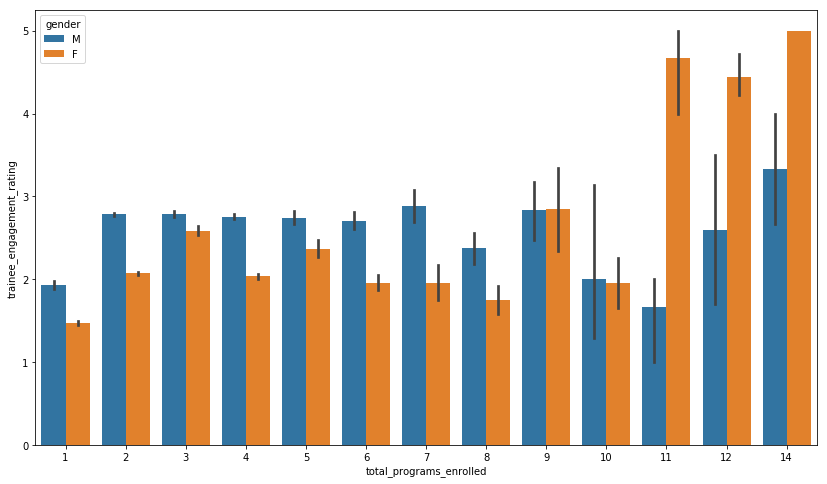

In [41]:
plt.figure(figsize=(14,8))
sns.barplot(y = 'trainee_engagement_rating', x = 'total_programs_enrolled', hue = 'gender', data = train)

## Males trainee engagewment rating goes down if they are enrooled in more than 10 programs,thier trainee-Engagement rating is very low as compared to there feamle counterparts

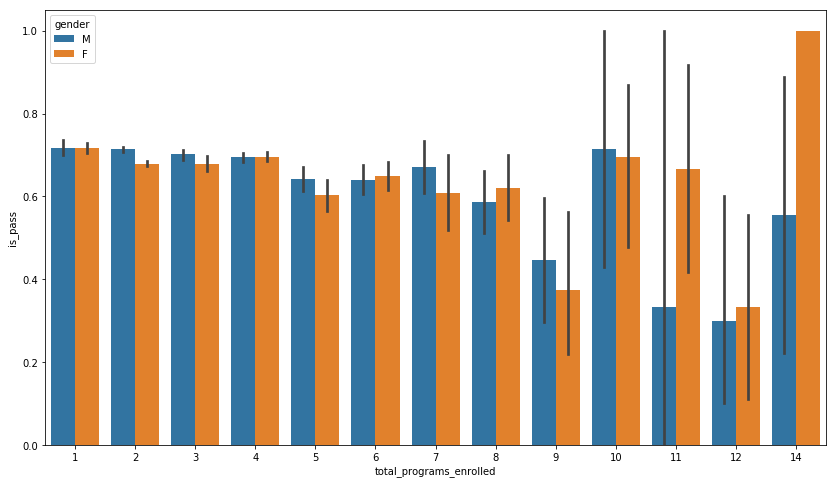

In [42]:
plt.figure(figsize=(14,8))
sns.barplot(y = 'is_pass', x = 'total_programs_enrolled', hue = 'gender', data = train)

## Females tends to outperform males if programs_enrolled > 10, that will just be a vague sattement i need to investigate more.
## possible questions to answer
## no of females and no of males enrolled in the programs > 10, does it have a significant impact on the regular distribution or they are just few anamolies 

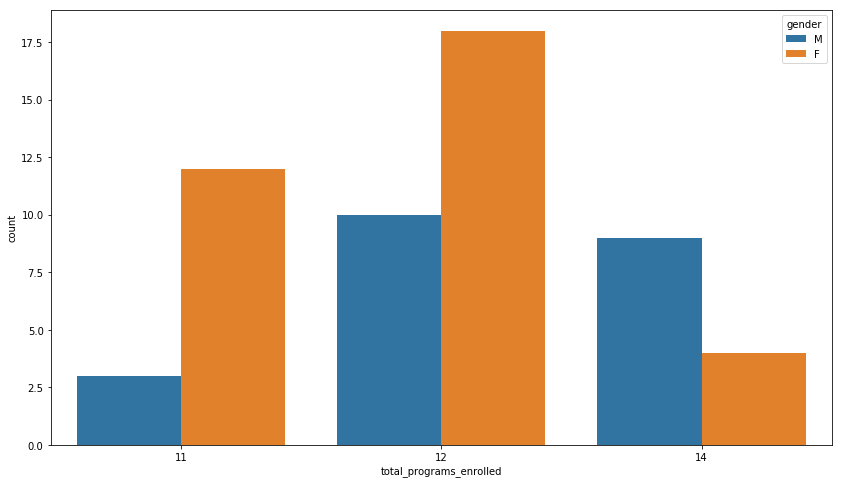

In [43]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'total_programs_enrolled' , hue = 'gender' , data = train[train['total_programs_enrolled']>10])

## Here is the exact report :
* for program = 11 males = 3, females = 12
* for program = 12 males = 9 , females = 18 
* for program =  14 males = 8 , feamsles = 4

## ok so no.  are too small to generalize the distribution, so we will stick to our usual distribution

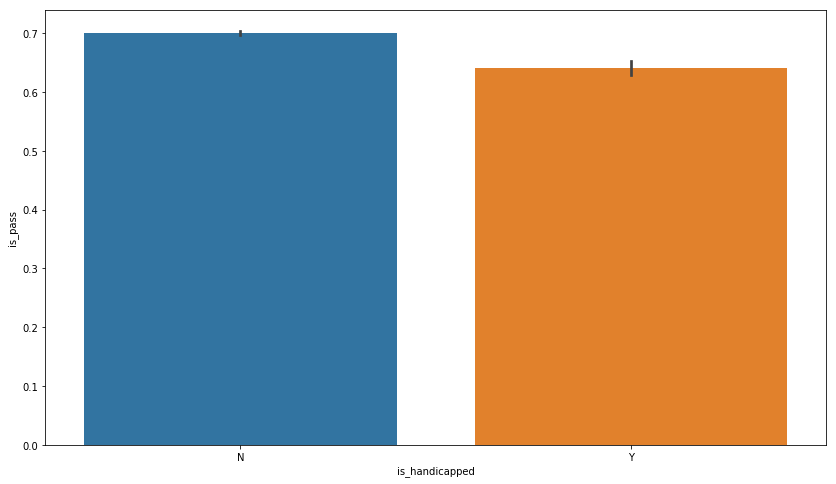

In [44]:
## Now let's check what will be the effect of the is_handicapped on the sucess rate of the candidate
plt.figure(figsize=(14,8))
sns.barplot(y = 'is_pass', x = 'is_handicapped', data = train)

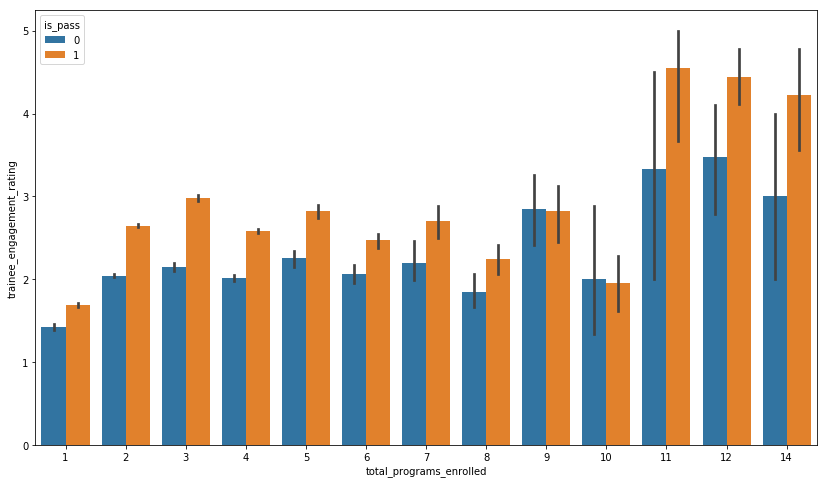

In [45]:
# Barplot between trrainee_engagement_rating and total_programs_enrolled, hue is_pass
plt.figure(figsize=(14,8))
sns.barplot(y = 'trainee_engagement_rating', x = 'total_programs_enrolled', hue = 'is_pass', data = train)

In [46]:
##  I am speculating that training_engagement rating is highly corelated with the is_pass (target)variable
## Lets try to build the voilenplot
train_c.dtypes

id                            object
program_id                    object
program_type                  object
program_duration               int64
test_id                        int64
test_type                     object
difficulty_level              object
trainee_id                     int64
gender                        object
education                     object
city_tier                      int64
age                          float64
total_programs_enrolled        int64
is_handicapped                object
trainee_engagement_rating    float64
is_pass                        int64
dtype: object

##  one of the thing which can be a good feature is total_programs_enrolled will be to make 5+ programs via list comprehension, but for bour baseline model i will keep them as it is.

In [47]:
q = train_c['trainee_engagement_rating'].value_counts().sort_values(ascending = False)
print(q)
print("percentage of passed candidates of different rating 1")
print(train_c[train_c['trainee_engagement_rating'] == 1]['is_pass'].value_counts()) 
print("")
print("percentage of passed candidates of different rating 2")
print(train_c[train_c['trainee_engagement_rating'] == 2]['is_pass'].value_counts()) 
print("")
print("percentage of passed candidates of different rating 3")
print(train_c[train_c['trainee_engagement_rating'] == 3]['is_pass'].value_counts()) 
print("")
print("percentage of passed candidates of different rating 4")
print(train_c[train_c['trainee_engagement_rating'] == 4]['is_pass'].value_counts()) 
print("")
print("percentage of passed candidates of different rating 5")
print(train_c[train_c['trainee_engagement_rating'] == 5]['is_pass'].value_counts()) 
print("")

1.0    25672
2.0    17234
4.0    13113
3.0    11553
5.0     5575
Name: trainee_engagement_rating, dtype: int64
percentage of passed candidates of different rating 1
1    15178
0    10494
Name: is_pass, dtype: int64

percentage of passed candidates of different rating 2
1    11808
0     5426
Name: is_pass, dtype: int64

percentage of passed candidates of different rating 3
1    8525
0    3028
Name: is_pass, dtype: int64

percentage of passed candidates of different rating 4
1    10548
0     2565
Name: is_pass, dtype: int64

percentage of passed candidates of different rating 5
1    4808
0     767
Name: is_pass, dtype: int64



## There is a direct relationship between the trainee_engeagement _rating with the is_pass (target) variable , let's list out the ratio of pass/fail at different rating
* rating1 : ratio 1
* rating2 : ratio 2
* rating3 : ratio 3
* rating4 : ratio 5
* rating5 : ratio 7
## which means candidates with good traineee_engagement rating are more likely to pass the exam.

## program_id and program_type are same thing so we will drop any one of them. So we will drop program_id 

# Now start with dropping the columns

In [48]:
col_drop = ['program_id', 'id', 'test_id','trainee_id']    ## we will eliminate age from here.since wew ill use ut as it is.
train_o = train_c.drop(col_drop , axis = 1)
print(train_o.shape)
train_o.head()

(73147, 12)


,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,Y,136,offline,intermediate,M,Matriculation,3,26.0,5,N,1.0,0
1,T,131,offline,easy,F,High School Diploma,4,30.0,2,N,3.0,1
2,Z,120,online,easy,M,Matriculation,1,45.0,1,N,2.0,1
3,T,117,offline,easy,F,Matriculation,3,NaN,4,N,1.0,1
4,V,131,offline,intermediate,F,High School Diploma,1,43.0,2,N,4.0,1


In [49]:
e = [1,2,5,6,8,90]
d = [5 if i >5 else i for i in e] 
d
train.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')

In [50]:

## Lets tyy out some feture transformation ideas.
## replace masters with bachelors
## if total_programs_enrolled >5 then assign 5 , jsut to keep the distribution uniform idk if it will work or not.
def feat_transform(data):
    data['education'] = data['education'].replace('Masters', 'Bachelors')
    data['total_programs_enrolled'] = [5 if i > 5 else i for i in data.total_programs_enrolled]
    

In [51]:
feat_transform(train_o)
print(set(train_o['education']))
print(set(train_o['total_programs_enrolled']))

{'High School Diploma', 'Bachelors', 'Matriculation', 'No Qualification'}
{1, 2, 3, 4, 5}


In [82]:
## now just dummy the necessary variables
columns = ['program_type', 'test_type','program_duration', 'difficulty_level', 'gender', 'education', 'total_programs_enrolled', 'is_handicapped', 'trainee_engagement_rating']
train_orig = pd.get_dummies(train_o , columns = columns)    ## remove city_tier give it a try 
print(train_orig.shape)
print(train_orig.columns)


(73147, 44)
Index(['city_tier', 'age', 'is_pass', 'program_type_S', 'program_type_T',
       'program_type_U', 'program_type_V', 'program_type_X', 'program_type_Y',
       'program_type_Z', 'test_type_offline', 'test_type_online',
       'program_duration_117', 'program_duration_120', 'program_duration_121',
       'program_duration_122', 'program_duration_130', 'program_duration_131',
       'program_duration_133', 'program_duration_134', 'program_duration_135',
       'program_duration_136', 'difficulty_level_easy',
       'difficulty_level_hard', 'difficulty_level_intermediate',
       'difficulty_level_vary hard', 'gender_F', 'gender_M',
       'education_Bachelors', 'education_High School Diploma',
       'education_Matriculation', 'education_No Qualification',
       'total_programs_enrolled_1', 'total_programs_enrolled_2',
       'total_programs_enrolled_3', 'total_programs_enrolled_4',
       'total_programs_enrolled_5', 'is_handicapped_N', 'is_handicapped_Y',
       'trainee_e

In [83]:
train_df, test_df = train_test_split(train_orig, test_size = 0.25, random_state= 1984)

In [84]:
train_y = train_df.is_pass
test_y = test_df.is_pass

train_x = train_df.drop(['is_pass'], axis = 1)
test_x = test_df.drop(['is_pass'], axis = 1)

In [85]:
## lets fit in our first ml model 

dtrain = xgb.DMatrix(data=train_x, label=train_y)
params = {
    "Objective": 'gbtree',
    "eval_metric": 'auc',
    #"eta": 0.1
}
cv = xgb.cv(params=params, dtrain=dtrain, num_boost_round=100, nfold=5, seed=41, early_stopping_rounds= 10)
cv.tail(1)

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
26,0.761197,0.002078,0.718884,0.003655


In [86]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
xgbcl = XGBClassifier(n_estimators=14, seed=41)
xgbcl.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=14,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=41, silent=True,
       subsample=1)

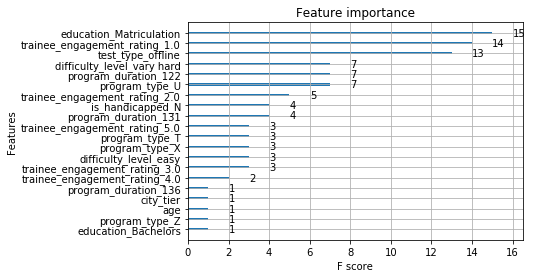

In [88]:
xgb.plot_importance(xgbcl)

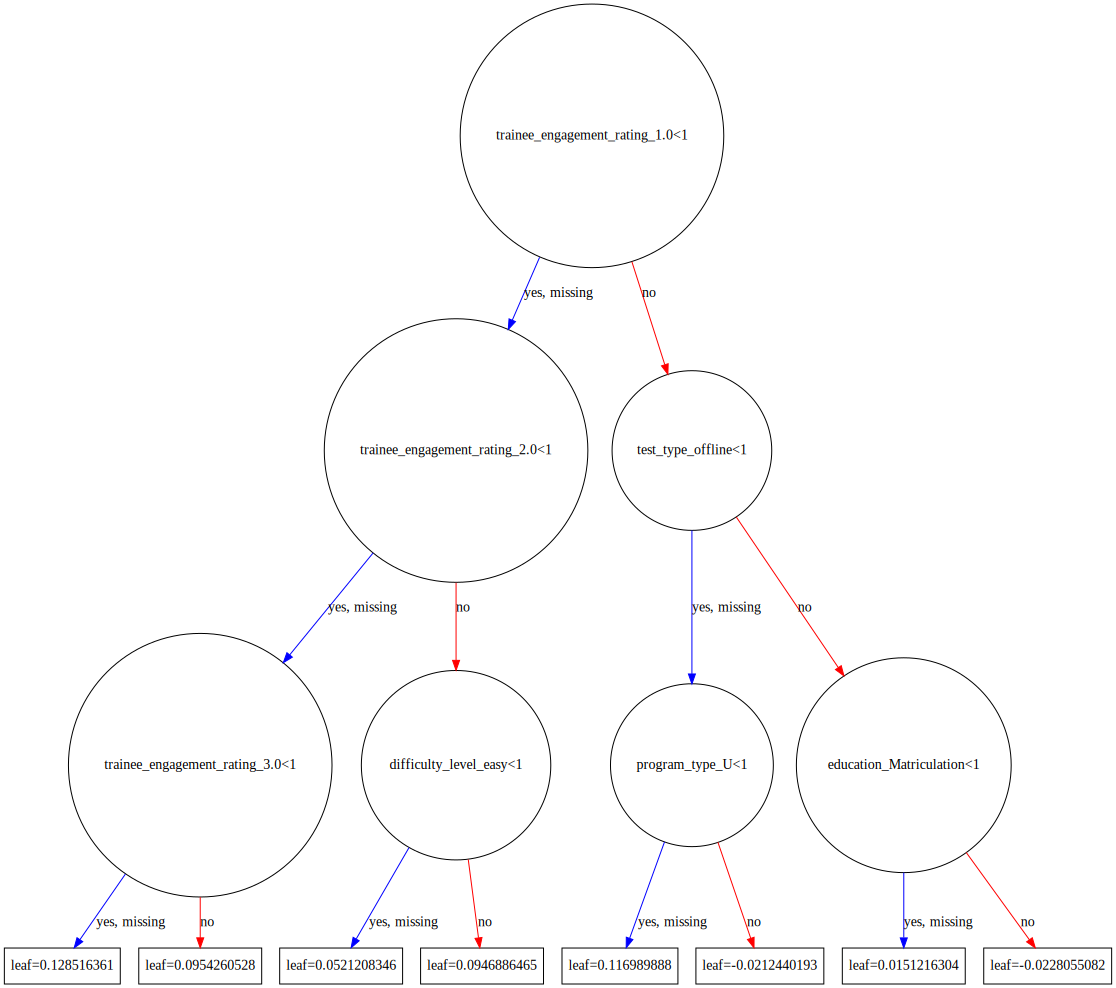

In [89]:
xgb.to_graphviz(xgbcl)

In [90]:
from sklearn.metrics import roc_auc_score, r2_score, accuracy_score, classification_report 

[0]	train-auc:0.706043+0.00178879	test-auc:0.693715+0.00391272
[100]	train-auc:0.784733+0.000640602	test-auc:0.721318+0.00393027
num_boost_rounds=84


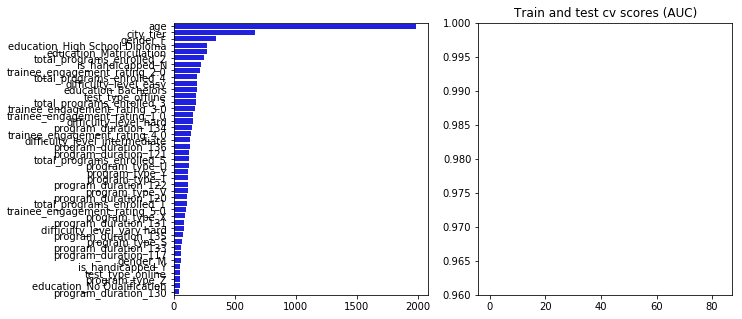

Threshold: 0.5
Accuracy:  67.80 %
R2:        -0.5279
AUC:       0.6707
Misclass.: 5888 (~32.20 %) out of 18287
             precision    recall  f1-score   support

       stay     0.4757    0.6522    0.5501      5520
       left     0.8209    0.6892    0.7493     12767

avg / total     0.7167    0.6780    0.6892     18287



In [91]:
### XGBoost
# prepare dict of params for xgboost to run with
xgb_params = {
    'n_trees': 100, 
    'eta': 0.1,
    'max_depth': 7,
    'subsample': 0.75,
    'colsample_bytree': 0.75,
    'objective': 'binary:logistic',
    'scale_pos_weight': float(len(train_y)-sum(train_y)) / sum(train_y),
    'eval_metric': 'auc',
    'silent': 1
}
# form DMatrices for Xgboost training
dtrain_xgb = xgb.DMatrix(train_x, train_y)
dtest_xgb = xgb.DMatrix(test_x, test_y)
# xgboost, cross-validation
cv_result_xgb = xgb.cv(xgb_params, 
                   dtrain_xgb, 
                   num_boost_round=5000,
                   nfold = 5,
                   stratified=True,
                   early_stopping_rounds=50,
                   verbose_eval=100, 
                   show_stdv=True
                  )
num_boost_rounds_xgb = len(cv_result_xgb)
print('num_boost_rounds=' + str(num_boost_rounds_xgb))
# train model
model_xgb = xgb.train(dict(xgb_params, silent=0), 
                      dtrain_xgb, 
                      num_boost_round=num_boost_rounds_xgb)

### Visualizations about the training process:
plt.figure(figsize=(10,5))
# Features importance
plt.subplot(1,2,1)
features_score_xgb = pd.Series(model_xgb.get_fscore()).sort_values(ascending=False)
sns.barplot(x=features_score_xgb.values, 
            y=features_score_xgb.index.values, 
            orient='h', color='b')
# CV scores
plt.subplot(1,2,2)
train_scores = cv_result_xgb['train-auc-mean']
train_stds = cv_result_xgb['train-auc-std']
plt.plot(train_scores, color='blue')
plt.fill_between(range(len(cv_result_xgb)), 
                 train_scores - train_stds, 
                 train_scores + train_stds, 
                 alpha=0.1, color='blue')
test_scores = cv_result_xgb['test-auc-mean']
test_stds = cv_result_xgb['test-auc-std']
plt.plot(test_scores, color='red')
plt.fill_between(range(len(cv_result_xgb)), 
                 test_scores - test_stds, 
                 test_scores + test_stds, 
                 alpha=0.1, color='red')
plt.title('Train and test cv scores (AUC)')
plt.ylim(0.96,1)
plt.show()

### Evaluation
threshold = 0.5
y_pred_xgb = model_xgb.predict(dtest_xgb)
y_cl_xgb = [1 if x > threshold else 0 for x in y_pred_xgb]
print('Threshold:', threshold)
print('Accuracy:  {:.2f} %'.format(accuracy_score(test_y, y_cl_xgb)*100))
print('R2:        {:.4f}'.format(r2_score(test_y, y_cl_xgb)))
print('AUC:       {:.4f}'.format(roc_auc_score(test_y, y_cl_xgb)))
mis = sum(np.abs(test_y - np.array(y_cl_xgb)))
print('Misclass.: {} (~{:.2f} %) out of {}'.format(mis, 
                                                   float(mis)/len(test_y)*100, 
                                                   len(test_y)))
print(classification_report(test_y, 
                            y_cl_xgb, 
                            labels=[0,1], 
                            target_names=['stay', 'left'], 
                            digits=4))

# previous AUC score = .6755 misclass = 32.05% leaderboard .6785
# Now after feature transformation AUC = .6707 miscalss = 32.36%

In [92]:
## Now lets do some pre processing on the actual test data make submissions 
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 15 columns):
id                           31349 non-null object
program_id                   31349 non-null object
program_type                 31349 non-null object
program_duration             31349 non-null int64
test_id                      31349 non-null int64
test_type                    31349 non-null object
difficulty_level             31349 non-null object
trainee_id                   31349 non-null int64
gender                       31349 non-null object
education                    31349 non-null object
city_tier                    31349 non-null int64
age                          28905 non-null float64
total_programs_enrolled      31349 non-null int64
is_handicapped               31349 non-null object
trainee_engagement_rating    31349 non-null float64
dtypes: float64(2), int64(5), object(8)
memory usage: 3.6+ MB


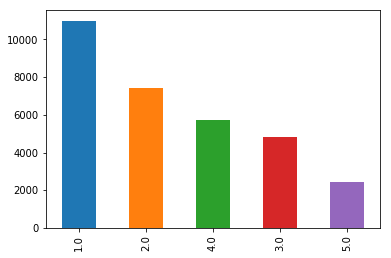

In [93]:
test['trainee_engagement_rating'].value_counts().plot(kind = 'bar')

In [94]:
test['trainee_engagement_rating'].fillna(1,inplace = True)

In [95]:
#test['age17_40'] = [1 if ((i>=17)&(i<40)) else 0 for i in test.age]
#test['age40+'] = [1 if i >= 40 else 0 for i in test.age]

In [96]:
ids = test['id']
col_drop = ['program_id', 'id', 'test_id', 'trainee_id']
tests = test.drop(col_drop , axis = 1)
print(tests.shape)
tests.head()

(31349, 11)


,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,T,131,offline,intermediate,F,Matriculation,3,50.0,2,N,4.0
1,Y,135,online,easy,M,Bachelors,3,22.0,4,N,4.0
2,Y,120,online,easy,M,Matriculation,3,24.0,2,N,3.0
3,V,122,offline,vary hard,F,High School Diploma,1,27.0,2,N,2.0
4,V,122,offline,intermediate,F,Matriculation,3,18.0,2,N,2.0


In [97]:
feat_transform(tests)
print(set(tests['education']))
print(set(tests['total_programs_enrolled']))

{'High School Diploma', 'Bachelors', 'Matriculation', 'No Qualification'}
{1, 2, 3, 4, 5}


In [98]:
columns = ['program_type', 'test_type','program_duration','difficulty_level', 'gender', 'education', 'total_programs_enrolled', 'is_handicapped', 'trainee_engagement_rating']
test_orig = pd.get_dummies(tests, columns = columns)      ## remove program duration and city tier
print(test_orig.shape)
print(test_orig.columns)

(31349, 43)
Index(['city_tier', 'age', 'program_type_S', 'program_type_T',
       'program_type_U', 'program_type_V', 'program_type_X', 'program_type_Y',
       'program_type_Z', 'test_type_offline', 'test_type_online',
       'program_duration_117', 'program_duration_120', 'program_duration_121',
       'program_duration_122', 'program_duration_130', 'program_duration_131',
       'program_duration_133', 'program_duration_134', 'program_duration_135',
       'program_duration_136', 'difficulty_level_easy',
       'difficulty_level_hard', 'difficulty_level_intermediate',
       'difficulty_level_vary hard', 'gender_F', 'gender_M',
       'education_Bachelors', 'education_High School Diploma',
       'education_Matriculation', 'education_No Qualification',
       'total_programs_enrolled_1', 'total_programs_enrolled_2',
       'total_programs_enrolled_3', 'total_programs_enrolled_4',
       'total_programs_enrolled_5', 'is_handicapped_N', 'is_handicapped_Y',
       'trainee_engagement_r

In [99]:
dtest_xgb = xgb.DMatrix(test_orig, )
dtest_xgb

In [100]:
## predict the output 
dtest_xgb = xgb.DMatrix(test_orig, )
threshold = 0.5
y_pred_xgb = model_xgb.predict(dtest_xgb)
y_cl_xgb = [1 if x > threshold else 0 for x in y_pred_xgb]
value = y_cl_xgb

In [101]:
sub = pd.DataFrame({'id' : ids , 'is_pass' : value})
sub.head()

,id,is_pass
0,1626_45,0
1,11020_130,1
2,12652_146,1
3,7038_72,0
4,888_71,0


In [102]:
sub.to_csv('Submission.csv' , index = False)

In [ ]:
## BAsleine score on public scoreboard  .6785
## add the age features  and make necessary changes 

In [ ]:
import lightgbm as lgb 

In [ ]:
## lets implement a LGBM
##  LightGBM 
lgb_params = {
    'learning_rate': 0.1,
    'max_depth': 7,
    'num_leaves': 40, 
    'objective': 'binary',
    'feature_fraction': 0.75,
    'bagging_fraction': 0.75,
    'metric': 'auc',
    'max_bin': 100}
# form LightGBM datasets
dtrain_lgb = lgb.Dataset(train_x, label=train_y)
dtest_lgb = lgb.Dataset(test_x, label=test_y)
# LightGBM, cross-validation
cv_result_lgb = lgb.cv(lgb_params, 
                       dtrain_lgb, 
                       num_boost_round=5000, 
                       nfold=5, 
                       stratified=True, 
                       early_stopping_rounds=50, 
                       verbose_eval=100, 
                       show_stdv=True)
num_boost_rounds_lgb = len(cv_result_lgb['auc-mean'])
print('num_boost_rounds_lgb=' + str(num_boost_rounds_lgb))
# train model
model_lgb = lgb.train(lgb_params, 
                      dtrain_lgb, 
                      num_boost_round=num_boost_rounds_lgb)

### Visualizations about the training process:
plt.figure(figsize=(10,5))
# Features importance
plt.subplot(1,2,1)
feature_imp = pd.Series(dict(zip(train_x.columns, 
                                 model_lgb.feature_importance())
                            )
                       ).sort_values(ascending=False)
sns.barplot(x=feature_imp.values, y=feature_imp.index.values, orient='h', color='g')
# CV scores
plt.subplot(1,2,2)
train_scores = np.array(cv_result_lgb['auc-mean'])
train_stds = np.array(cv_result_lgb['auc-stdv'])
plt.plot(train_scores, color='green')
plt.fill_between(range(len(cv_result_lgb['auc-mean'])), 
                 train_scores - train_stds, 
                 train_scores + train_stds, 
                 alpha=0.1, color='green')
plt.title('LightGMB CV-results')
plt.ylim(0.96,1)
plt.show()

### Evaluation
threshold = 0.5
y_pred_lgb = model_lgb.predict(test_x)
y_cl_lgb = [1 if x > threshold else 0 for x in y_pred_lgb]
print('Threshold:', threshold) 
print('Accuracy:  {:.2f} %'.format(accuracy_score(test_y, y_cl_lgb)*100))
print('R2:        {:.4f}'.format(r2_score(test_y, y_cl_lgb)))
print('AUC:       {:.4f}'.format(roc_auc_score(test_y, y_cl_lgb)))
mis = sum(np.abs(test_y - np.array(y_cl_lgb)))
print('Misclass.: {} (~{:.2f} %) out of {}'.format(mis, 
                                                   float(mis)/len(test_y)*100, 
                                                   len(test_y)))
print(classification_report(test_y, 
                            y_cl_lgb, 
                            labels=[0,1], 
                            target_names=['stay', 'left'], 
                            digits=4))

In [ ]:
sub.to_csv('Submission1.csv' , index = False)

In [ ]:
## Let's build the baseline gradientboosting 
train_orig.head()

In [ ]:
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [ ]:
tr_x , te_x = train_test_split(train_orig, test_size = 0.25 , random_state = 23)

In [ ]:
tr_x.head()

In [ ]:
tr_y = tr_x['is_pass']
te_y = te_x['is_pass']

In [ ]:
tr_x.drop(['is_pass'] , axis = 1 , inplace = True)
te_x.drop(['is_pass'] , axis = 1 , inplace = True)

In [ ]:
tr_x = np.array(tr_x)
te_x = np.array(te_x)

In [ ]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(tr_x , tr_y)
predictions = gb.predict(te_x)

print("Confusion Matrix:")
print(confusion_matrix(te_y , predictions))
print()
print("Classification Report")
print(classification_report(te_y , predictions))

In [ ]:
y_scores_gb = gb.decision_function(te_x)
fpr_gb, tpr_gb, _ = roc_curve(te_y , y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

In [ ]:
## predict
e = gb.predict(test_orig)
e

In [ ]:
sub1 = pd.DataFrame({'id' : ids , 'is_pass' : e})
sub1.head()

In [ ]:
sub1.to_csv('Submission1.csv' , index = False)